# Analise Exploratória. Introdução ao Pandas

## Importando dados e manipulando DataFrame e Series

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando um arquivo csv
notas = pd.read_csv('./dados/ratings.csv')

In [3]:
# Exibir os 5 primeiros registro do dataset importado
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Formato da tabela(Array)
notas.shape

(100836, 4)

In [5]:
# Alterando o nome das colunas do DataFrame
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# Exibindo a Series de nota
notas['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [8]:
# Listando somento os valores unicos da coluna nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
# O pandas utiliza a biblioteca numerica numpy, portanto o retorno do unique() é um ndarray numpy
type(notas['nota'].unique())

numpy.ndarray

In [10]:
# Contar a frequencia de cada nota e o retorno é ordenado do maior para o menor
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [11]:
# Media dos valores da coluna nota
print("Media", notas['nota'].mean(), sep=": ")
# Mediana dos valores da coluna nota
print("Mediana",notas['nota'].median(), sep=": ")

Media: 3.501556983616962
Mediana: 3.5


## Visualizando dados com histograma e boxplot

In [12]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
# PLOTANDO GRAFICOS COM O PANDAS 
# O pandas utiliza por baixo dos panos o matplotlib para plotar graficos

# Podemos plotar um grafico dessa meneira
notas.nota.plot.hist()
# Ou dessa maneira
notas.nota.plot(kind='hist')

# O Hist é um Histrograma, gráfico de frequência "quantidade que se repete uma unica nota"
# O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico 
# de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes
# (uniformes ou não uniformes).

In [14]:
# Descrever algumas estatisticas ideais para uso
# count: quantidade de registros
# mean: media
# std: desvio padrão
# min: Valor minino (Menor nota)
# 25%: 1 quartil. Significa que 25% ou 1/4 das notas é menor que 3
# 50%: 2 e 3 quartil. Significa que 50% ou 2/4 das notas é maior que 3 e menor que 4
# 75%: 4 quartil. Significa que 25% ou 1/4 das notas é maior que 4
# max: Valor Maximo (Nota maxima)
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

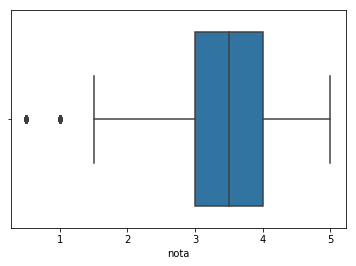

In [15]:
# Com o pandas usamos indiretamente o matplotlib para a visualização de dados, porem podemos usar outras libs e 
# uma muito famosa é a seaborn (sns)
# O seaborn tambem utiliza o matplotlib por baixo dos panos para plotar
import seaborn as sns

# Plotando um boxplot (grafico de caixa) para ver a dispersão de nossas notas
# Podemos notar no grafico, na caixa azul que 50% das notas é entre 3 e 4
sns.boxplot(notas.nota)

# Já o boxplot, também conhecido como "distribuição de frequências", é um método alternativo 
# para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.

# Análise exploratória de dados e mais gráficos (Exploratory data analysis)

## Analisando as notas por titulos

In [16]:
# Carregando dados de filmes
filmes = pd.read_csv('./dados/movies.csv')
# Alterando o nome das colunas
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas espeficicas por filme

In [18]:
# O Pandas disponibiliza query para realizarmos consultas em nosso DataSet
notas.query('filmeId==1').head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [19]:
# Podemos selecionar uma series, porque o retorno da query é um DataSet filtrado com somente os filmes de id 1
notas.query('filmeId==1').nota.head()

0       4.0
516     4.0
874     4.5
1434    2.5
1667    4.5
Name: nota, dtype: float64

In [20]:
# Podemos filtrar com ids dinâmicamente
filmeId = 1
notas.query(f'filmeId=={filmeId}').head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [21]:
# Filtrar os filmes por id 1, selecionar somente a Series note e executar a função mean para retornar a media 
# da series nota selecionada
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [22]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [23]:
# Tipo de retorno da função groupby. DataFrameGroupBy
type(notas.groupby('filmeId'))

pandas.core.groupby.generic.DataFrameGroupBy

In [24]:
# Podemos agrupar um DataFrame por uma Serie, ou seja, os valores unico da Series selecionada vai ser os grupos e
# os valores de cada coluna vai ser a media. Temos que ficar atento para não considerarmos a media de Ids, no caso
# de usuarioId. Portanto vamos selecionar somente o que importa que é a media das notas por filmeId. 
# Podemos notar que o DataFrame comum tem um index incremental, sem "nenhum significado" e o DataFrameGroupBy tem
# como index o id do agrupamento, ou seja da Series escolhida para agruparmos (filmeId)

notas.groupby('filmeId').mean().nota
# Ou
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

# Podemos comparar com o resultado da query(filmeId == 1) gerando a media da Series nota.

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

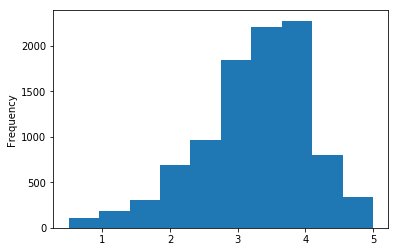

In [25]:
# Vamos plotar um histograma para analisar a frequencia de medias por filmes
medias_por_filme.plot.hist()

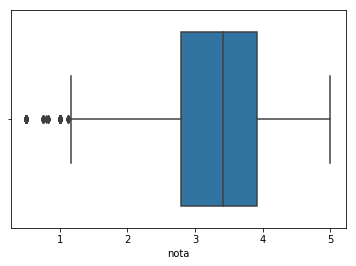

In [26]:
# Plotando boxplot com seaborn
# Analisando o boxplot, podemos concluir que a mediana das media esta entre a media 2.8 a 3.8 aproximadamente.
# Porem temos que resolver os outliers para melhorar a distribução das notas para melhorar as medias.
sns.boxplot(medias_por_filme)

In [27]:
# Podemos ver detalhadamente os resultados estatistico das medias por filmes
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

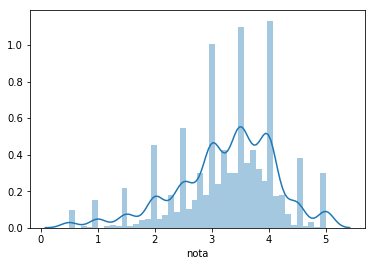

In [28]:
# Plotando histograma com seaborn
sns.distplot(medias_por_filme)

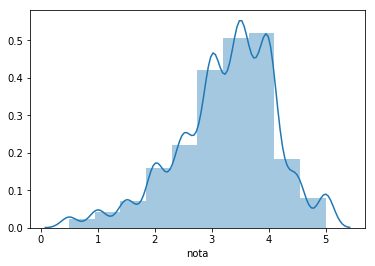

In [29]:
# Podemos analisar no grafico acima que contem muitas barras para representar a frequencia, podemos configurar
# bins = 10 -> Barras para representar a frequencias das medias por filmes no histrograma
sns.distplot(medias_por_filme, bins=10)

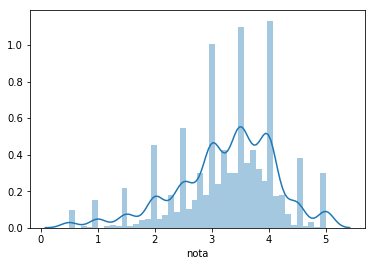

In [30]:
# Porem temos que tomar cuidado com a definição de barras porque podemos passar uma mensagem "errada" e o seaborn 
# tem por padrão algumas boas praticas para definir a quantidade de barras ideais para os nossos dados
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

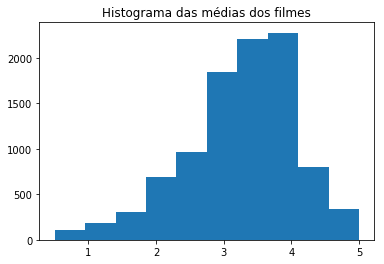

In [31]:
# O matplotlib pode ser considerada uma biblioteca de plotagem de baixo nivel que muitas outras utilizam
import matplotlib.pyplot as plt

# Exempo de plotando um histograma de medias por filmes
plt.hist(medias_por_filme)
# Adicionando um titulo ao grafico
plt.title('Histograma das médias dos filmes')

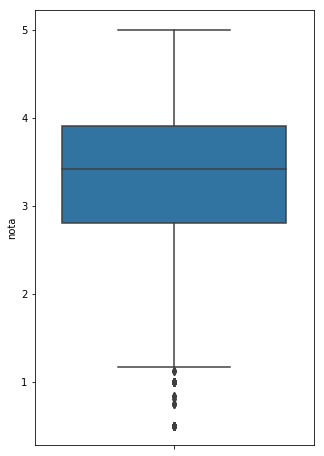

In [32]:
# O matplotlib pode ser considerada uma biblioteca de plotagem de baixo nivel que muitas outras utilizam
import matplotlib.pyplot as plt
# Como o seaborn utiliza o matplotlib, podemos importa-lo e configura-lo para o seaborn utilizar
# Por exemplo, vamos configurar o tamanho da figura de plotagem
plt.figure(figsize=(5,8))

# Por padrão o boxplot do seaborn esta na horizontal e é muito utilizado na vertical, para isso o seaborn
# fornece a opção de escolher
sns.boxplot(y=medias_por_filme)

## Variáveis

In [33]:
tmdb = pd.read_csv('./dados/tmdb_5000_movies.csv') 
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [34]:
# Selecionando todas linguas unicas do DataFrame da coluna original_language
tmdb.original_language.unique()  # Coluna é categorica nominal porque não existe uma ordem, é simplesmente uma
                                 # categoria

# Exemplo de uma coluna categorica ORDINAL é os grau de ensino
# primeiro grau
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [35]:
# budget/orçamento => quantitativo continuo . Porque é uma coluna numerica que pode variar qualquer valor

In [36]:
# quantidade de votos => 1,2,3,4,5,6... não existe 2.5 votos => quantitativa, 
# ela contem um intervalo de 1 em 1 e uma ordem
# Outro exemplo de variavel quantitativa
# notas do movielens => 0.5,1,1.5 ...

In [37]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [38]:
tmdb.vote_average.describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

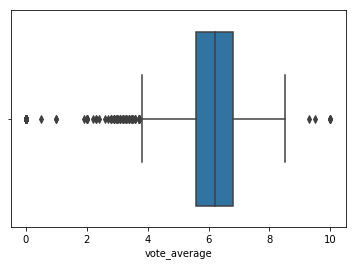

In [39]:
sns.boxplot(tmdb.vote_average)

In [40]:
# Listandos a quantidade de valores que se repetem na variavel original_language
# O retorno é uma Series, com o index(original_language) e o valor(quantidade de repetição)
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ta       2
cs       2
id       2
ro       2
ar       2
xx       1
tr       1
sl       1
pl       1
no       1
vi       1
te       1
ps       1
el       1
is       1
nb       1
hu       1
ky       1
af       1
Name: original_language, dtype: int64

In [41]:
# Listando os indexes de uma Series
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'he', 'th', 'ta', 'cs', 'id', 'ro', 'ar', 'xx',
       'tr', 'sl', 'pl', 'no', 'vi', 'te', 'ps', 'el', 'is', 'nb', 'hu', 'ky',
       'af'],
      dtype='object')

In [42]:
# Listando os valores de uma Series
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [43]:
# Podemos transformar uma Series em um DataFrame
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


In [44]:
# Com o DataFrame criado atraves de uma Series, podemos resetar os index para a language transforme em uma
# coluna então vamos ter duas colunas, language e values
# Quando resetamos o index, o pandas adiciona um novo index incremental
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
# Renomeando o nome das colunas
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


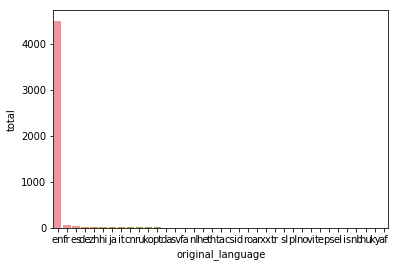

In [45]:
# Vamos plotar nossas linguas(categorias) em um grafico categorical
# Podemos configurar a coluna do DataFrame que vai ser plotada no eixo x e y
sns.barplot(x = 'original_language', y= 'total', data = contagem_de_lingua)

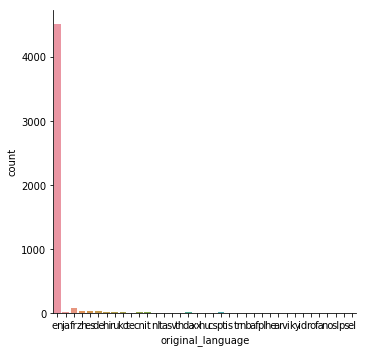

In [46]:
# A plotagem a cima é mais baixo nivel, por que tivemos que selecionar as repetição o que retorno uma Series,
# transformar em um DataFrame e depois renomear os nomes das colunas.
# Porem o Seaborn tem uma forma de plotar graficos com funções mais de alto nivel, onde de um DataFrame completo
# informamos a variavel no DataFrame que é nossa categoria e temos que informar como o seaborn vai processar, por
# exemplo, no nosso caso ele vai contar a quantidade de repetições dos valores da variavel original_language
sns.catplot(x= 'original_language', kind='count', data= tmdb)

([<matplotlib.patches.Wedge at 0x7fcdbeca3f98>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

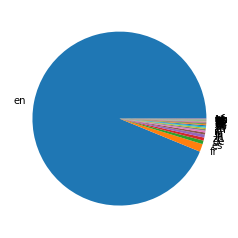

In [47]:
# Podemos analisar se um grafico de torta(pie) fica melhor que o de barra
plt.pie(contagem_de_lingua['total'],labels= contagem_de_lingua['original_language'])
# Como podemos ver, o grafico de torta é muito ruim para quase todos os casos, não é recomendado
# utiliza-lo

In [48]:
# Como nos nossos dados a categoria en esta muito superior as outras, 
# vamos comparar a categoria en com todo o resto
total_por_lingua = tmdb['original_language'].value_counts()
# O loc vai localizar um registro especifico na Series pelo index que é o original_language
total_de_ingles = total_por_lingua.loc['en']
# E para geral dos valores da Series
total_geral = total_por_lingua.sum()
# E para saber o resto o total do resto das linguas, vamos subtrair o total de ingles pelo total geral
total_do_resto = total_geral - total_de_ingles
# Imprimindo as quantidades da categoria en e o resto de todas categorias
print(total_de_ingles, total_do_resto)

4505 298


In [49]:
# Para plotar o grafico, vamos criar um DataFrame com a quantidade de filmes em ingles e a quantidade do resto
# de linguas dos filmes
dados = {
    'lingua': ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [50]:
# Criando um DataFrame em cima dos dados
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


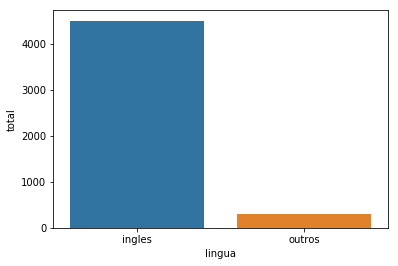

In [51]:
# Plotando um grafico de barra com o DataFrame de dados criado
sns.barplot(x='lingua', y='total', data=dados)
# Podemos analisar no grafico a diferença entre quantidade de ingles que o restante das lingua

([<matplotlib.patches.Wedge at 0x7fcdbeb9f7f0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

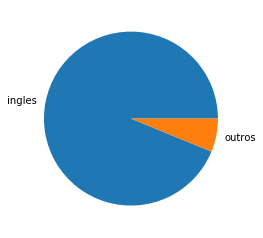

In [52]:
# Como o grafico de Torta(pie), não conseguimos medir a grandesa da diferença dos dados
# Ja no grafico de barras conseguimos, por não se tratar de área como o grafico de torta se trata
plt.pie(dados['total'],labels= dados['lingua'])

In [53]:
#  Podemos ver a distribuição dos filmes que não é da categoria original_language (en)
# Para isso, podemos executar query com o pandas, buscando os filmes diferente de en
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'")['original_language'].value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ar     2
cs     2
ro     2
ta     2
id     2
tr     1
ky     1
no     1
af     1
el     1
nb     1
is     1
hu     1
ps     1
xx     1
vi     1
te     1
sl     1
pl     1
Name: original_language, dtype: int64

In [54]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

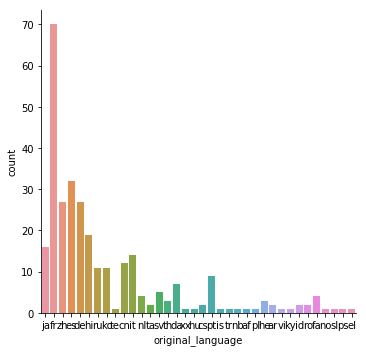

In [55]:
# Com a query feita removendo os filmes en, podemos plotar em grafico de barras os filmes
# por original_lenguage(categoria)
sns.catplot(x='original_language', data=filmes_sem_lingua_original_em_ingles, kind='count')

<Figure size 360x720 with 0 Axes>

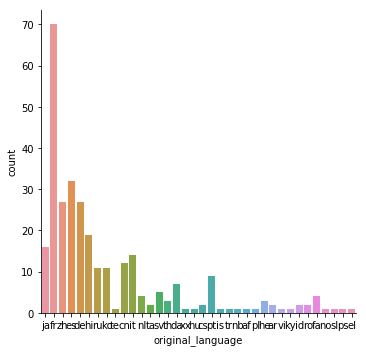

In [56]:
# Podemos analisar que o grafico acima ficou dificil de visualizar por conter muitas categorias
# Portanto, vamos refinar o nosso grafico para podermos visualizar melhor

# Configurar o tamanho da figura retangular
plt.figure(figsize=(5,10))
sns.catplot(x='original_language', data=filmes_sem_lingua_original_em_ingles, kind='count')
# Podemos ver que não mudou o tamanho e o motivo é simples, a função catplot é uma função de alto nivel,
# portanto o Seaborn configura em outra função o tamanho da figura, ou seja quem vai definir o tamanho da
# figura vai ser o Seaborn. 

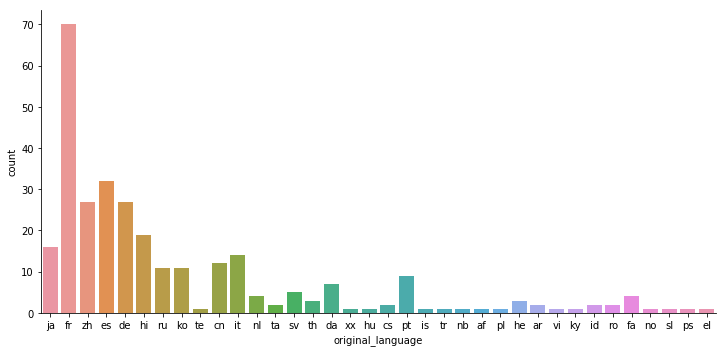

In [57]:
# Para modificar o tamanho usando o catplot, temos que dobrar a largura
sns.catplot(x='original_language', data=filmes_sem_lingua_original_em_ingles, kind='count', aspect=2)

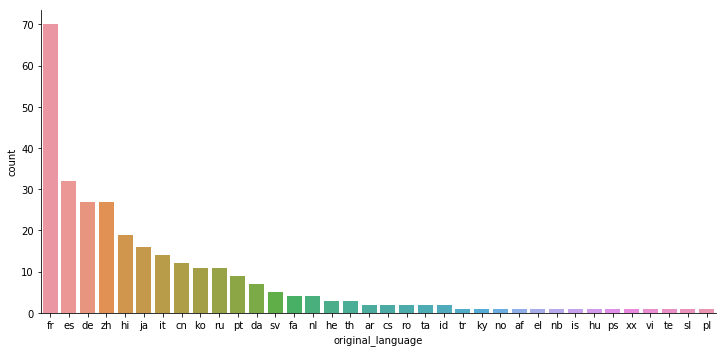

In [58]:
# Podemos ver que o gráfico não esta organizado ordenadamente. Temos que tomar cuidado ao ordenar os graficos, 
# porque no caso acima, as categorias não tem uma ordem, mas se fosse categorias de anos, ai teria uma ordem
# e poderia atrapalhar

# O seaborn catplot tem um parametro para ordenar as categorias por quantidade
# Para isso vamos utilizar o value_counts que atribuimos a variavel total_por_lingua_de_outros_filmes
# e utilizar a indexação para ordenar
sns.catplot(x='original_language', data=filmes_sem_lingua_original_em_ingles, kind='count', 
            aspect=2, order=total_por_lingua_de_outros_filmes.index)


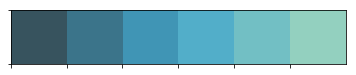

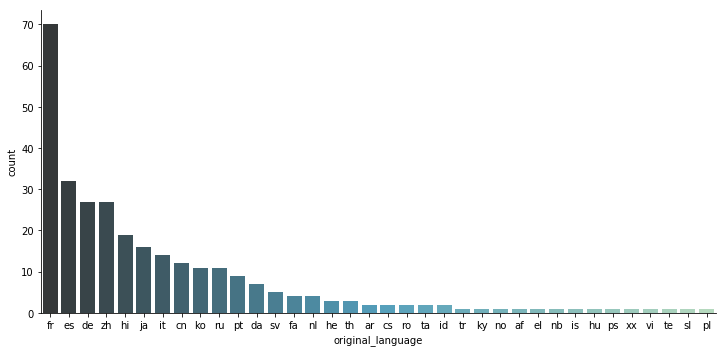

In [59]:
# Vamos melhorar a tonalidade das cores das barras com a pallete do seaborn utilizando a tecnica sequential
sns.palplot(sns.color_palette('GnBu_d'))

# Para definir a tonalidade das barras, vamos usar o parametro pallete
sns.catplot(x='original_language', data=filmes_sem_lingua_original_em_ingles, kind='count', 
            aspect=2, order=total_por_lingua_de_outros_filmes.index, palette="GnBu_d")


## Exemplo de graficos scatter

In [60]:
import seaborn as sns
sns.set(style='ticks')

In [61]:
# Carregar um DataSet de exemplo do Seaborn
df = sns.load_dataset("anscombe")

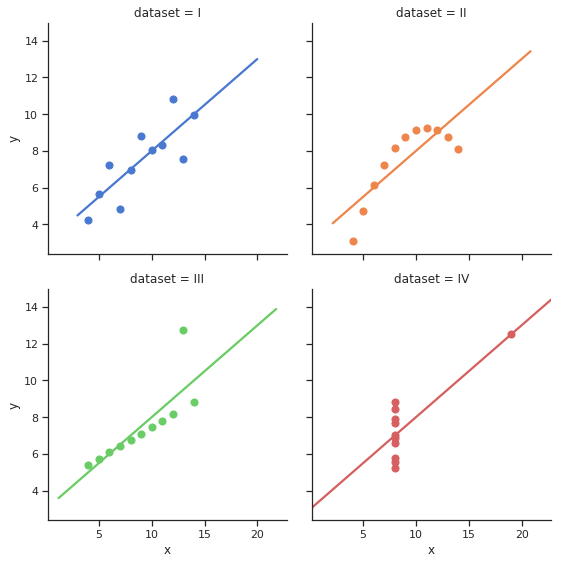

In [62]:
# Plotar graficos com os resultados de regressão linear
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot, histrograma

In [64]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [65]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [72]:
# Filtrandos as notas do filme de id 1 e 2
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [78]:
# Printando a medía de notas do filme toy story
print('Nota média do Toy Story %.2f' % notas_do_toy_story['nota'].mean())
# Printando a medía de notas do filme Jumanji
print('Nota média do Jumanji %.2f' % notas_do_jumanji['nota'].mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [79]:
# Printando a mediana de notas do filme toy story
print('Nota mediana do Toy Story %.2f' % notas_do_toy_story['nota'].median())
# Printando a mediana de notas do filme Jumanji
print('Nota mediana do Jumanji %.2f' % notas_do_jumanji['nota'].median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [94]:
# As Media, mediana e moda, mede o centro de todos os nossos valores ou a tendencia dos valores. Portanto,
# não consiguimos identificar quantas pessoas que votaram muito baixo ou muito e utilizando a media, mediana
# ou moda, perdemos a informação de como esse dados se distribui

# Exemplo
import numpy as np
# Com o numpy, vamos criar um array que tenha o valor 2.5 10 vezes dentro dele
array1 = np.array([2.5] * 10)
array1
array2 = np.array([3.5] * 10)
array2
# Podemos unir os valores dos 2 array em um unico array com o append
filme1 = np.append(array1, array2)
filme2 = np.append(np.array([5] * 10),np.array([1] * 10))
print('Filme 1: ', filme1, 'Filme 2: ', filme2)

Filme 1:  [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5 3.5
 3.5 3.5] Filme 2:  [5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1]


In [99]:
# Analisar a media do filme 1 e filme2
print('Média filme 1: ', filme1.mean(), 'Média filme 2: ', filme2.mean())
print('Mediana do filme 1: ', np.median(filme1), 'Mediana do filme 2: ', np.median(filme2))
# Podemos analisar que a media e a mediana tem o mesmo resultado, 3.0. Portanto, utilizando a media ou a mediana,
# vamos ter o mesmo valor, porem com notas totalmente diferentes.

Média filme 1:  3.0 Média filme 2:  3.0
Mediana do filme 1:  3.0 Mediana do filme 2:  3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

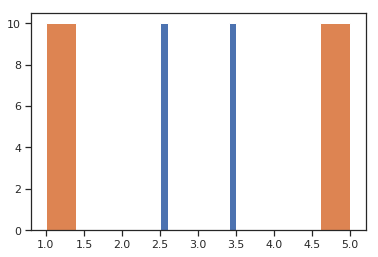

In [107]:
# Visualizando a distribuição das notas do filme1 e filme2 com um histograma
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcdb7313278>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcdb6db8c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcdb7313f28>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcdb6db8588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcdb6d05a58>,
 'means': []}

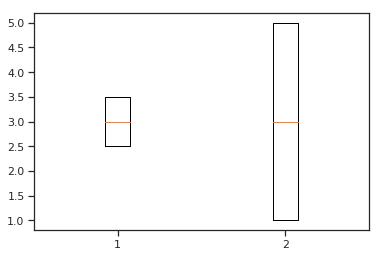

In [109]:
# Para analisar a distribução das notas do filme1 e filme2, vamos usar um grafico de caixa, boxplot
plt.boxplot([filme1, filme2])

# Podemos analisar no boxplot o quanto disperso esta os dados do filme2 comparado com o filme1

In [130]:
# Calculando o desvio padrão dos dois array numpy, filme1 e filme2
# e printando a media e mediana dois dois filmes
print('Média filme 1: ', filme1.mean(), 
      'Mediana do filme 1: ',np.median(filme1),'Desvio padrão filme1: ', np.std(filme1))
print('Média filme 2: ', filme2.mean(), 
      'Mediana do filme 2: ',np.median(filme2),'Desvio padrão filme2: ', np.std(filme2))

# Podemos analisar nos prints que a media não é muito relevante em tomadas de decisões
# Os dois array a media é igual, porem o desvio padrão é muito diferente, o array 1 a distancia dos valores
# até a mediana é bem menor que a do array 2

Média filme 1:  3.0 Mediana do filme 1:  3.0 Desvio padrão filme1:  0.5
Média filme 2:  3.0 Mediana do filme 2:  3.0 Desvio padrão filme2:  2.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcdb6d3dac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcdb6d3df60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcdb6d3d6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcdb6d60908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcdb6d60c88>,
 'means': []}

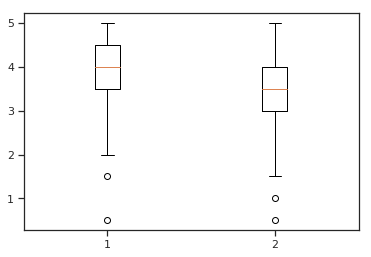

In [112]:
# Voltando as notas do toy story e jumanji, podemos analisar o quanto disperso estão as notas
plt.boxplot([notas_do_toy_story['nota'], notas_do_jumanji['nota']])

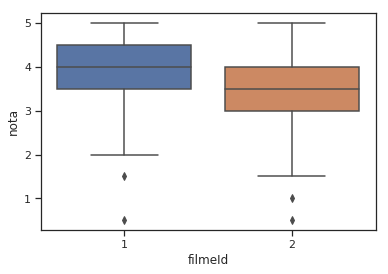

In [117]:
# O boxplot utilizando o matplotlib ficou bom, porem podemos melhorar utilizando o seaborn
# configurando-o o eixo x e y e realizando uma query para filtrar somente os filmes 1 e 2
sns.boxplot(x='filmeId', y='nota',data=notas.query('filmeId in [1,2]'))

# Bom, vimos que consiguimos medir uma tendencia central com a media, moda e mediana, vimos que podemos visualizar
# os dados de diversas maneiras, com tabelas e histogramas, vimos como visualizar a distribuição dos dados com o
# grafico boxblot e comparar a distribuição de dois array de dados com boxplot

In [120]:
# Printando a medía de notas do filme toy story
print('Nota média do Toy Story %.2f' % notas_do_toy_story['nota'].mean())
# Printando a medía de notas do filme Jumanji
print('Nota média do Jumanji %.2f' % notas_do_jumanji['nota'].mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [122]:
# Com a distribuição acima, vamos calcular a distancia entre o maior e menor ponto do centro(mediana) que é 
# chamado de desvio padrão
print('Desvio padrão notas toy story', notas_do_toy_story['nota'].std())
print('Desvio padrão notas jumanji', notas_do_jumanji['nota'].std())

Desvio padrão notas toy story 0.8348591407114045
Desvio padrão notas jumanji 0.8817134921476455


In [121]:
# Printando a mediana de notas do filme toy story
print('Nota mediana do Toy Story %.2f' % notas_do_toy_story['nota'].median())
# Printando a mediana de notas do filme Jumanji
print('Nota mediana do Jumanji %.2f' % notas_do_jumanji['nota'].median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50
